# Pruebas Machine Learning 

In [1]:
#Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# 2. Cargar el dataset original
df = pd.read_csv(r"C:\\users\\usuario\\Desktop\\FFFF\\proyecto_final_henry\\data\\flights.csv")

# 3. Seleccionar las dos variables relevantes para la regresión
variables = ['scheduled_departure', 'status']

# Eliminar filas con valores nulos en las columnas seleccionadas
df = df.dropna(subset=variables)

# Convertir 'scheduled_departure' a formato numérico (número de minutos desde medianoche)
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'], errors='coerce')
df['scheduled_departure'] = df['scheduled_departure'].dt.hour * 60 + df['scheduled_departure'].dt.minute

# Verificar y eliminar posibles valores nulos después de la conversión
df = df.dropna(subset=['scheduled_departure'])

# Convertir 'status' a formato numérico usando Label Encoding
le = LabelEncoder()
df['status_encoded'] = le.fit_transform(df['status'])

# Verificar los valores únicos después de la transformación
print(df[['status', 'status_encoded']].drop_duplicates())

# Agregar la columna de 'scheduled_departure' al DataFrame
df_encoded = df[['status_encoded', 'scheduled_departure']]

# Definir la variable independiente (X) y la variable dependiente (y)
X = df_encoded[['status_encoded']]
y = df_encoded['scheduled_departure']

# 6. Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 9. Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación R²: {r2}")

# 10. Mostrar los coeficientes del modelo para interpretar la importancia
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print(coeficientes)






        status  status_encoded
0    Scheduled               5
13   Cancelled               1
26     Arrived               0
30     On Time               4
32     Delayed               2
708   Departed               3
Error cuadrático medio: 45255.40737935
Coeficiente de determinación R²: 0.00024378702117611173
                Coeficientes
status_encoded      0.413681


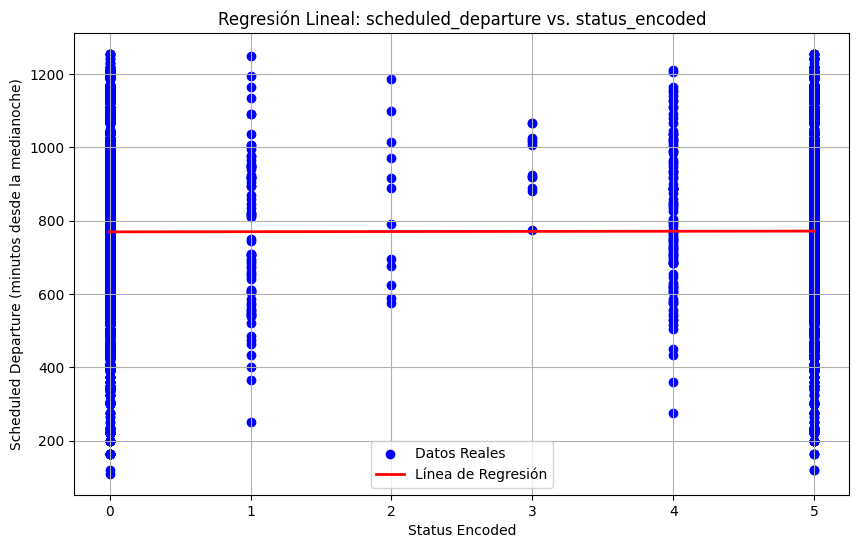

In [9]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))

# Graficar los datos reales
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.title('Regresión Lineal: scheduled_departure vs. status_encoded')
plt.xlabel('Status Encoded')
plt.ylabel('Scheduled Departure (minutos desde la medianoche)')
plt.legend()
plt.grid(True)
plt.show()


Este gráfico muestra la relación entre la ocupación de los vuelos (scheduled_departure) y el estado del vuelo (status_encoded). 
Los puntos azules representan los datos reales, mientras que la línea roja muestra la tendencia general calculada por el modelo de regresión lineal. 
La línea de regresión ayuda a visualizar cómo varía la ocupación en función del estado del vuelo

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


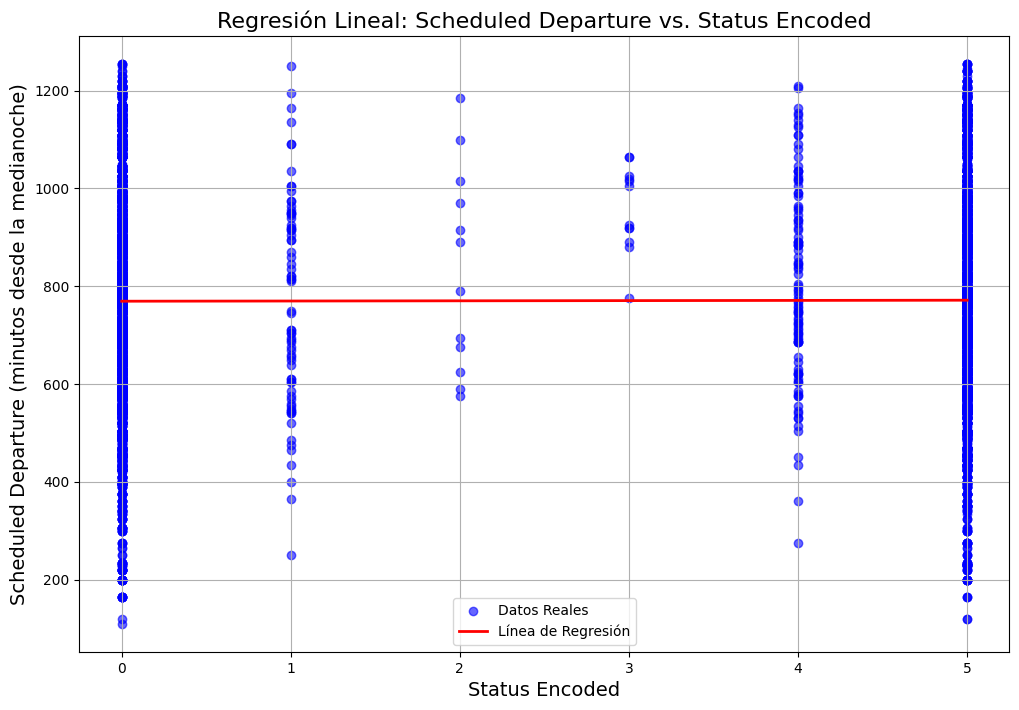

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Ordenar los valores de X_test para que la línea de regresión sea continua
X_test_sorted = np.sort(X_test.values.flatten())
y_pred_sorted = model.predict(X_test_sorted.reshape(-1, 1))

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(12, 8))

# Graficar los datos reales
plt.scatter(X_test, y_test, color='blue', label='Datos Reales', alpha=0.6)

# Graficar la línea de regresión
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Línea de Regresión')

# Configurar título y etiquetas
plt.title('Regresión Lineal: Scheduled Departure vs. Status Encoded', fontsize=16)
plt.xlabel('Status Encoded', fontsize=14)
plt.ylabel('Scheduled Departure (minutos desde la medianoche)', fontsize=14)

# Agregar leyenda
plt.legend()

# Agregar cuadrícula
plt.grid(True)

# Mostrar gráfico
plt.show()


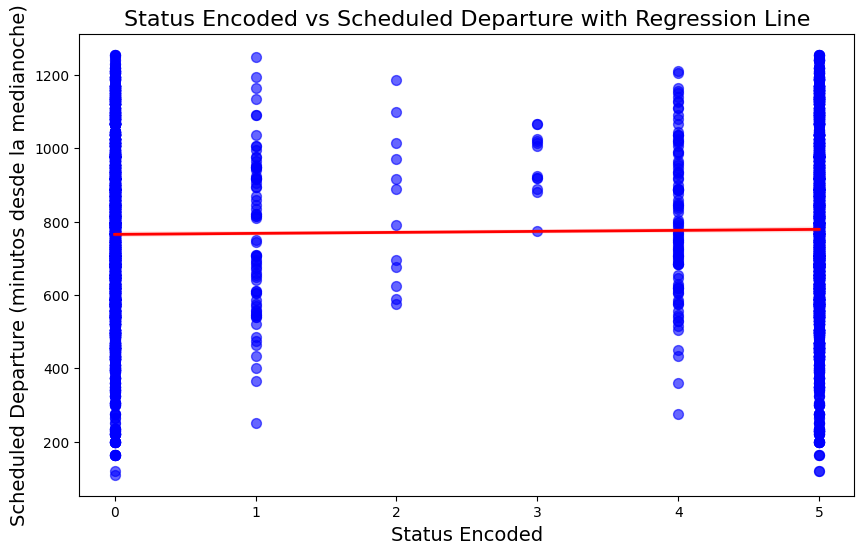

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los datos de prueba
data_filt = pd.DataFrame({
    'status_encoded': X_test['status_encoded'].values,
    'scheduled_departure': y_test.values
})

# Crear el gráfico de dispersión con una línea de regresión
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='status_encoded', y='scheduled_departure', data=data_filt,
            scatter_kws={'color': 'blue', 's': 50, 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2})

# Configurar título y etiquetas
plt.title('Status Encoded vs Scheduled Departure with Regression Line', fontsize=16)
plt.xlabel('Status Encoded', fontsize=14)
plt.ylabel('Scheduled Departure (minutos desde la medianoche)', fontsize=14)

# Mostrar gráfico
plt.show()





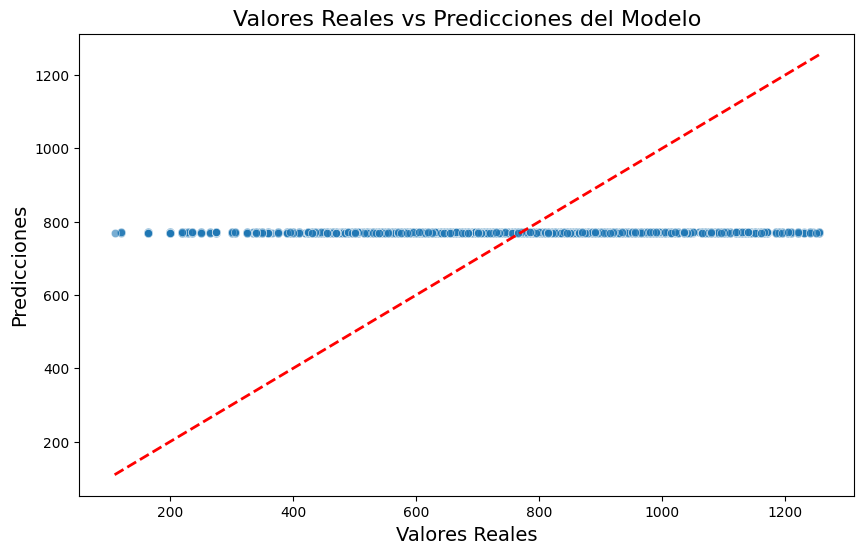

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Crear un DataFrame con las predicciones y valores reales
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Crear el gráfico de dispersión para comparar valores reales y predicciones
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.6)

# Añadir una línea de referencia diagonal
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'r--', linewidth=2)

# Configurar título y etiquetas
plt.title('Valores Reales vs Predicciones del Modelo', fontsize=16)
plt.xlabel('Valores Reales', fontsize=14)
plt.ylabel('Predicciones', fontsize=14)

# Mostrar gráfico
plt.show()


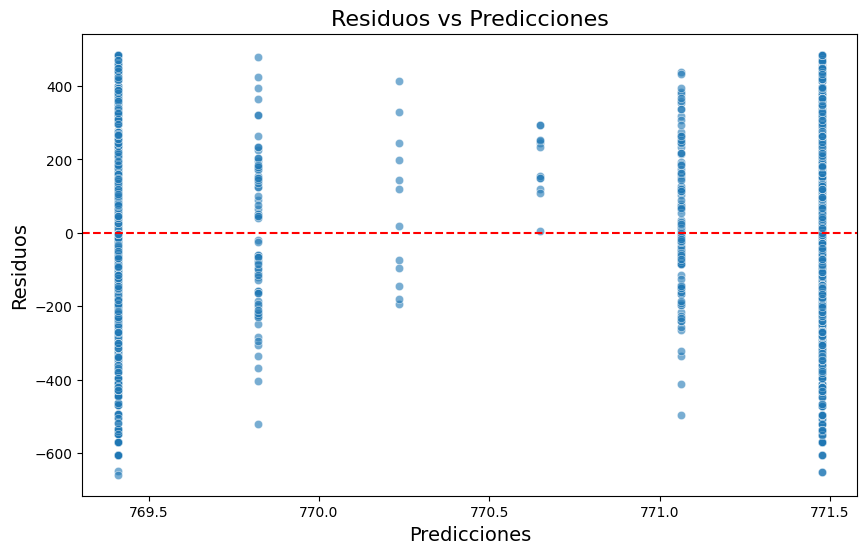

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos
residuals_df = pd.DataFrame({
    'Predicted': y_pred,
    'Residuals': residuals
})

# Crear el gráfico de residuos
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=residuals_df, alpha=0.6)

# Añadir una línea horizontal en y=0
plt.axhline(0, color='red', linestyle='--')

# Configurar título y etiquetas
plt.title('Residuos vs Predicciones', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Residuos', fontsize=14)

# Mostrar gráfico
plt.show()


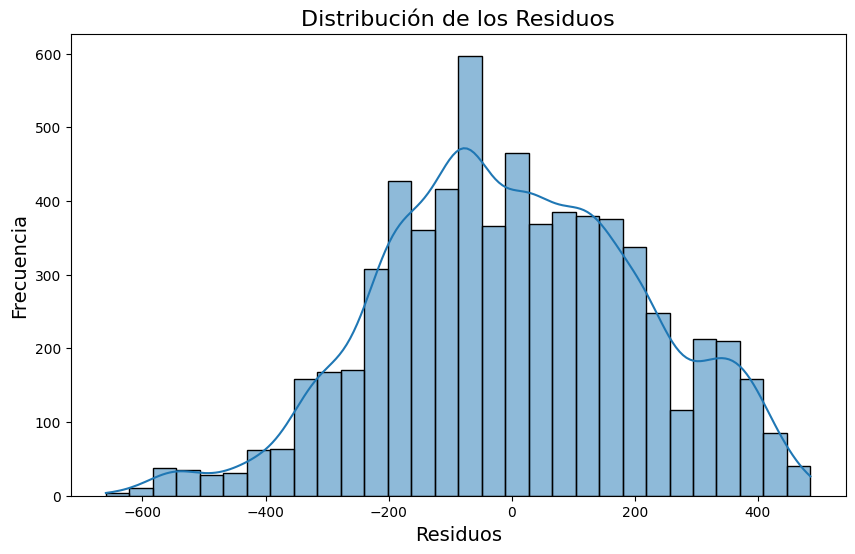

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los residuos
residuals_df = pd.DataFrame({
    'Residuals': residuals
})

# Crear el histograma de residuos
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(residuals_df['Residuals'], bins=30, kde=True)

# Configurar título y etiquetas
plt.title('Distribución de los Residuos', fontsize=16)
plt.xlabel('Residuos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar gráfico
plt.show()


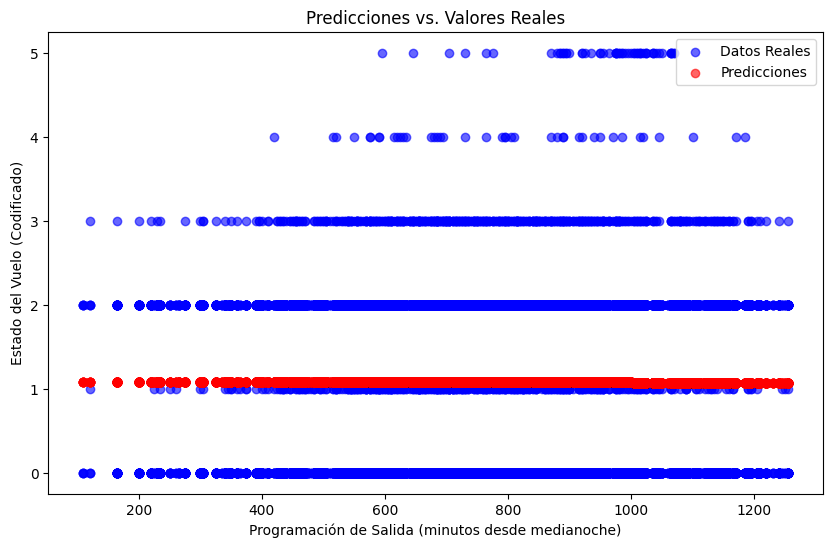

R^2: 2.961747363694478e-06
MAE: 1.007081239142915
MSE: 1.0638670697407742
RMSE: 1.03143931946614
 
Intercept: 1.0884327815369004
Coefficients:
               Feature  Coefficient
0  scheduled_departure    -0.000008


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.linear_model import LinearRegression

# Suponiendo que tienes un DataFrame df y has entrenado un modelo llamado 'model'

# Si 'status' fue codificado, asegúrate de usar el mismo encoding para las predicciones
df['status_encoded'] = pd.factorize(df['status'])[0]

# Crear el modelo de regresión lineal (Asegúrate de que este modelo ha sido ajustado previamente)
model = LinearRegression()
X = df[['scheduled_departure']]
y = df['status_encoded']
model.fit(X, y)

# Realizar predicciones
df['predictions'] = model.predict(X)

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar los datos reales vs. predicciones
plt.scatter(df['scheduled_departure'], df['status_encoded'], color='blue', label='Datos Reales', alpha=0.6)
plt.scatter(df['scheduled_departure'], df['predictions'], color='red', label='Predicciones', alpha=0.6)

# Añadir título y etiquetas
plt.xlabel('Programación de Salida (minutos desde medianoche)')
plt.ylabel('Estado del Vuelo (Codificado)')
plt.title('Predicciones vs. Valores Reales')
plt.legend()

# Mostrar el gráfico
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(df['status_encoded'], df['predictions'])
mae = mean_absolute_error(df['status_encoded'], df['predictions'])
mse = mean_squared_error(df['status_encoded'], df['predictions'])
rmse = mean_squared_error(df['status_encoded'], df['predictions'], squared=False)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': ['scheduled_departure'], 'Coefficient': model.coef_})

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(" ")

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:")
print(coef_df)

